# Lab Assignment 1

## Implement Perceptron Learning Algorithm (PLA)

Code the perceptron learning algorithm for OR, NOT, and AND gates using Python. Show the weights after each update. Plot the decision boundary after each weight update using Python built-in packages. (K4)

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def bias_add(X: np.ndarray) -> np.ndarray:
    return np.hstack([np.ones((X.shape[0], 1)), X])

In [51]:
def to_2d(X: np.ndarray) -> np.ndarray:
    if X.shape[1] == 1:
        return np.hstack([X, np.zeros((X.shape[0], 1))])
    return X

In [52]:
def predict_label(w: np.ndarray, x_aug: np.ndarray) -> int:
    return 1 if np.dot(w, x_aug) >= 0 else 0

In [53]:
def plot_decision_boundary(ax, X2d, y, w, title):
    class0 = y == 0
    class1 = y == 1
    ax.scatter(X2d[class0, 0], X2d[class0, 1], marker='o', label='Class 0')
    ax.scatter(X2d[class1, 0], X2d[class1, 1], marker='s', label='Class 1')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(title)

    w0, w1, w2 = w
    if np.isclose(w2, 0.0):
        if not np.isclose(w1, 0.0):
            x_vert = -w0 / w1
            ax.axvline(x=x_vert, linestyle='--', label='Decision Boundary')
    else:
        xs = np.linspace(-0.5, 1.5, 100)
        ys = -(w0 + w1 * xs) / w2
        ax.plot(xs, ys, '--', label='Decision Boundary')

    ax.legend()

In [54]:
class Perceptron:
    def __init__(self, lr=1.0, n_epochs=10, random_state=42, verbose=True):
        self.lr = lr
        self.n_epochs = n_epochs
        self.rng = np.random.RandomState(random_state)
        self.verbose = verbose
        self.w = None
        self.update_steps = 0
        self.snapshots = []
        self.figures = []

    def fit(self, X: np.ndarray, y: np.ndarray, gate_name: str):
        X2d = to_2d(X)
        X_aug = bias_add(X2d)

        self.w = self.rng.uniform(-0.5, 0.5, size=(X2d.shape[1] + 1,))
        if self.verbose:
            print(f"[{gate_name}] Initial weights: {self.w}")

        self.update_steps = 0
        self.snapshots = []

        for epoch in range(1, self.n_epochs + 1):
            error_count = 0
            for i, (xi_aug, target) in enumerate(zip(X_aug, y)):
                y_pred = predict_label(self.w, xi_aug)
                update = self.lr * (target - y_pred)
                if update != 0:
                    self.w += update * xi_aug
                    self.update_steps += 1
                    error_count += 1

                    if self.verbose:
                        print(
                            f"[{gate_name}] Epoch {epoch:02d}, sample {i}, "
                            f"y_true={target}, y_pred={y_pred}, update={update}, "
                            f"new_w={self.w}"
                        )

                    # store snapshot
                    self.snapshots.append({
                        "w": self.w.copy(),
                        "epoch": epoch,
                        "step": self.update_steps
                    })

            if error_count == 0:
                if self.verbose:
                    print(f"[{gate_name}] Converged at epoch {epoch}. Final weights: {self.w}\n")
                break

        self.X2d_ = X2d
        self.y_ = y
        return self.w

In [55]:
def get_gate_data(gate: str):
    gate = gate.upper()
    if gate == "AND":
        X = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
        y = np.array([0, 0, 0, 1])
    elif gate == "OR":
        X = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
        y = np.array([0, 1, 1, 1])
    elif gate == "NOT":
        X = np.array([[0],
                      [1]])
        y = np.array([1, 0])
    return X, y

In [56]:
gates = ["AND", "OR", "NOT"]
lr = 1.0
n_epochs = 50

[AND] Initial weights: [-0.12545988  0.45071431  0.23199394]
[AND] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  0.45071431 -0.76800606]
[AND] Epoch 01, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-0.12545988  1.45071431  0.23199394]
[AND] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  1.45071431 -0.76800606]
[AND] Epoch 02, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431 -0.76800606]
[AND] Epoch 02, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  0.23199394]
[AND] Epoch 03, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431  0.23199394]
[AND] Epoch 03, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  1.23199394]
[AND] Epoch 04, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  1.45071431  0.23199394]
[AND] Epoch 04, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  2.45071431  1.23199394]
[AND] Epoch 05, 

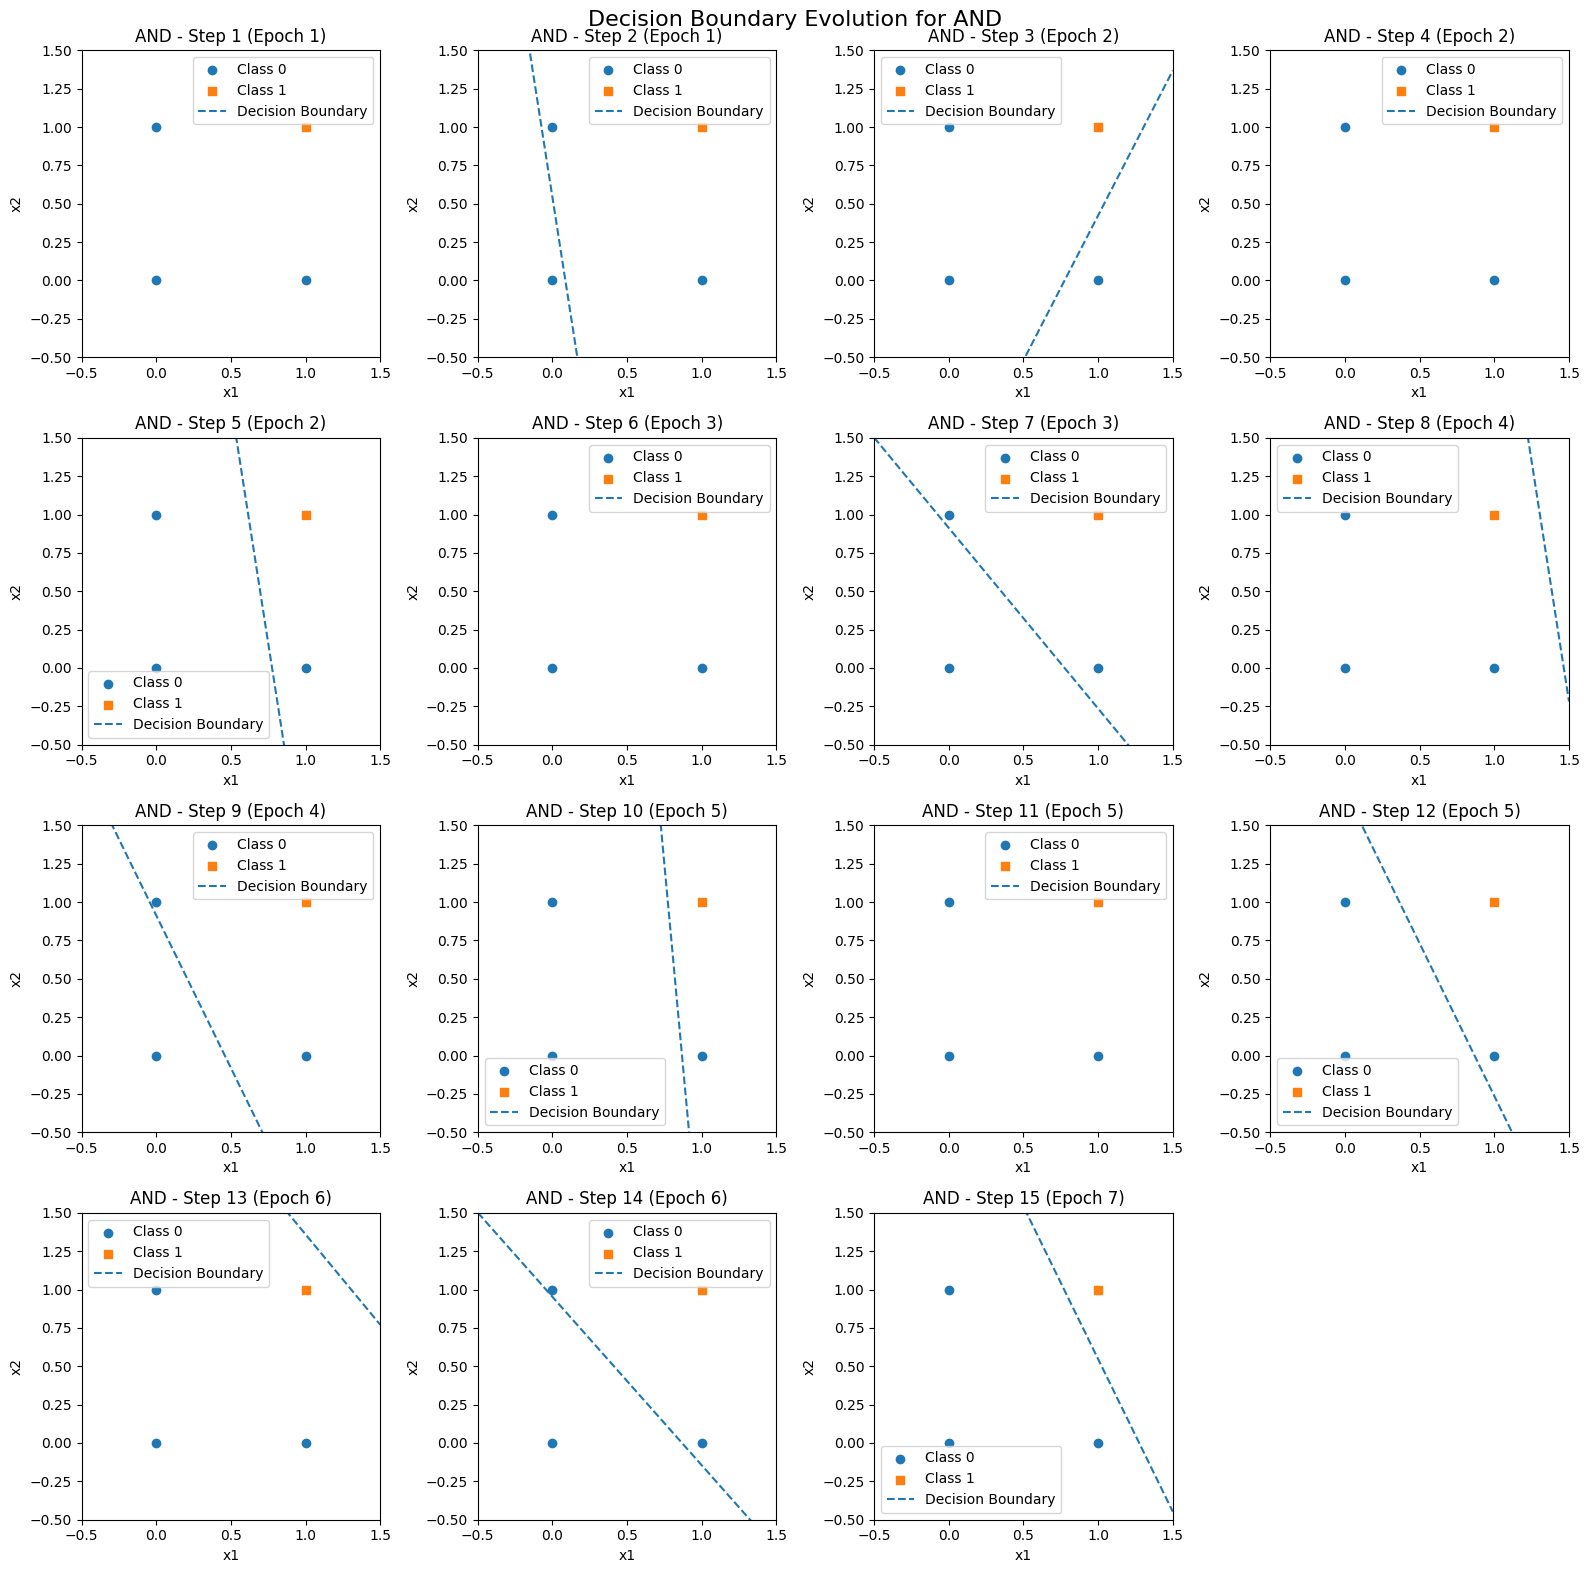

[AND] Training done. Final weights: [-3.12545988  2.45071431  1.23199394]
--------------------------------------------------------------------------------
[OR] Initial weights: [-0.12545988  0.45071431  0.23199394]
[OR] Converged at epoch 1. Final weights: [-0.12545988  0.45071431  0.23199394]

[OR] No weight updates happened (already separable with init weights).
[NOT] Initial weights: [-0.12545988  0.45071431  0.23199394]
[NOT] Epoch 01, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[0.87454012 0.45071431 0.23199394]
[NOT] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -1.54928569  0.23199394]
[NOT] Epoch 03, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -1.54928569  0.23199394]
[NOT] Converged at epoch 4. Final weights: [ 0.87454012 -1.5492

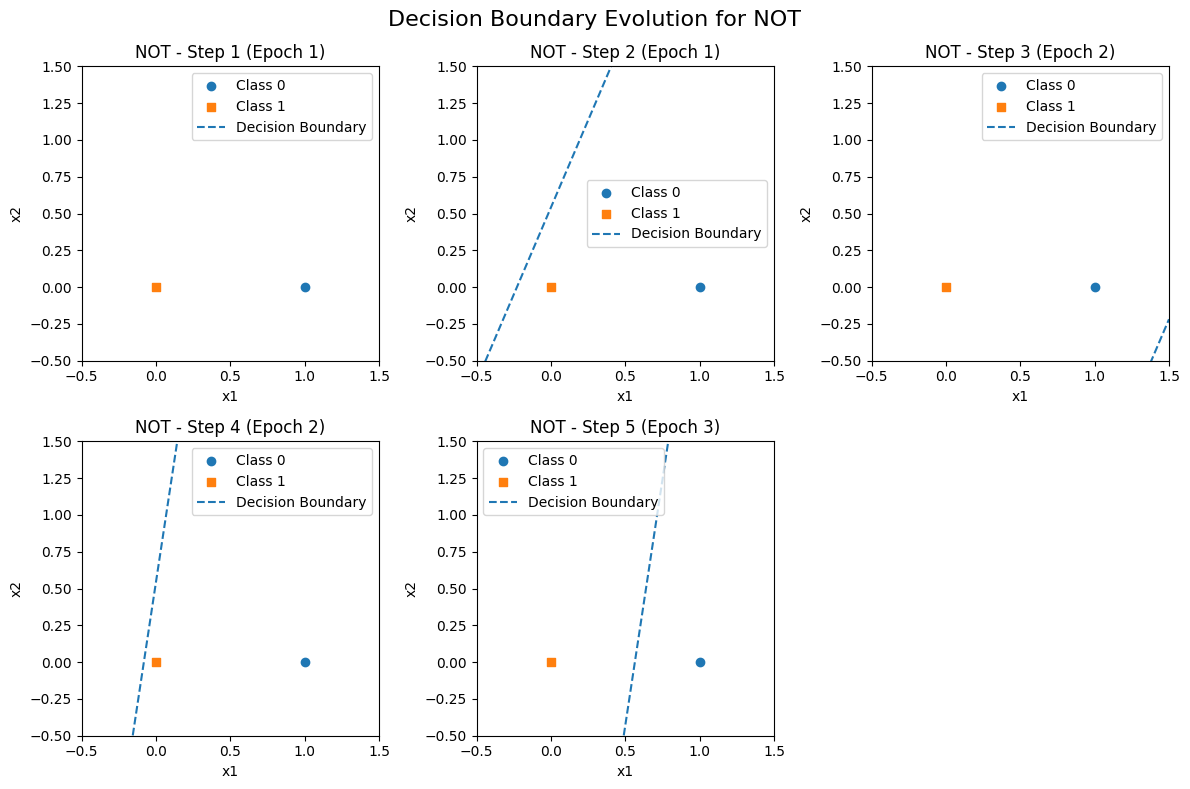

[NOT] Training done. Final weights: [ 0.87454012 -1.54928569  0.23199394]
--------------------------------------------------------------------------------


In [57]:
import math

for gate in gates:
    X, y = get_gate_data(gate)
    p = Perceptron(lr=lr, n_epochs=n_epochs, random_state=42, verbose=True)
    final_w = p.fit(X, y, gate_name=gate)

    snaps = p.snapshots
    n = len(snaps)
    if n == 0:
        print(f"[{gate}] No weight updates happened (already separable with init weights).")
        continue

    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    if rows == 1 and cols == 1:
        axs = np.array([axs])
    axs = axs.flatten()

    for i, s in enumerate(snaps):
        w = s["w"]
        step = s["step"]
        epoch = s["epoch"]
        plot_decision_boundary(
            ax=axs[i],
            X2d=p.X2d_,
            y=p.y_,
            w=w,
            title=f"{gate} - Step {step} (Epoch {epoch})"
        )

    # hide unused axes
    for j in range(n, len(axs)):
        axs[j].axis('off')

    plt.suptitle(f"Decision Boundary Evolution for {gate}", fontsize=16)
    plt.tight_layout()
    plt.show()

    print(f"[{gate}] Training done. Final weights: {final_w}")
    print("-" * 80)

[AND] Initial weights: [-0.12545988  0.45071431  0.23199394]
[AND] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  0.45071431 -0.76800606]
[AND] Epoch 01, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-0.12545988  1.45071431  0.23199394]
[AND] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  1.45071431 -0.76800606]
[AND] Epoch 02, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431 -0.76800606]
[AND] Epoch 02, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  0.23199394]
[AND] Epoch 03, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431  0.23199394]
[AND] Epoch 03, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  1.23199394]
[AND] Epoch 04, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  1.45071431  0.23199394]
[AND] Epoch 04, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  2.45071431  1.23199394]
[AND] Epoch 05, 

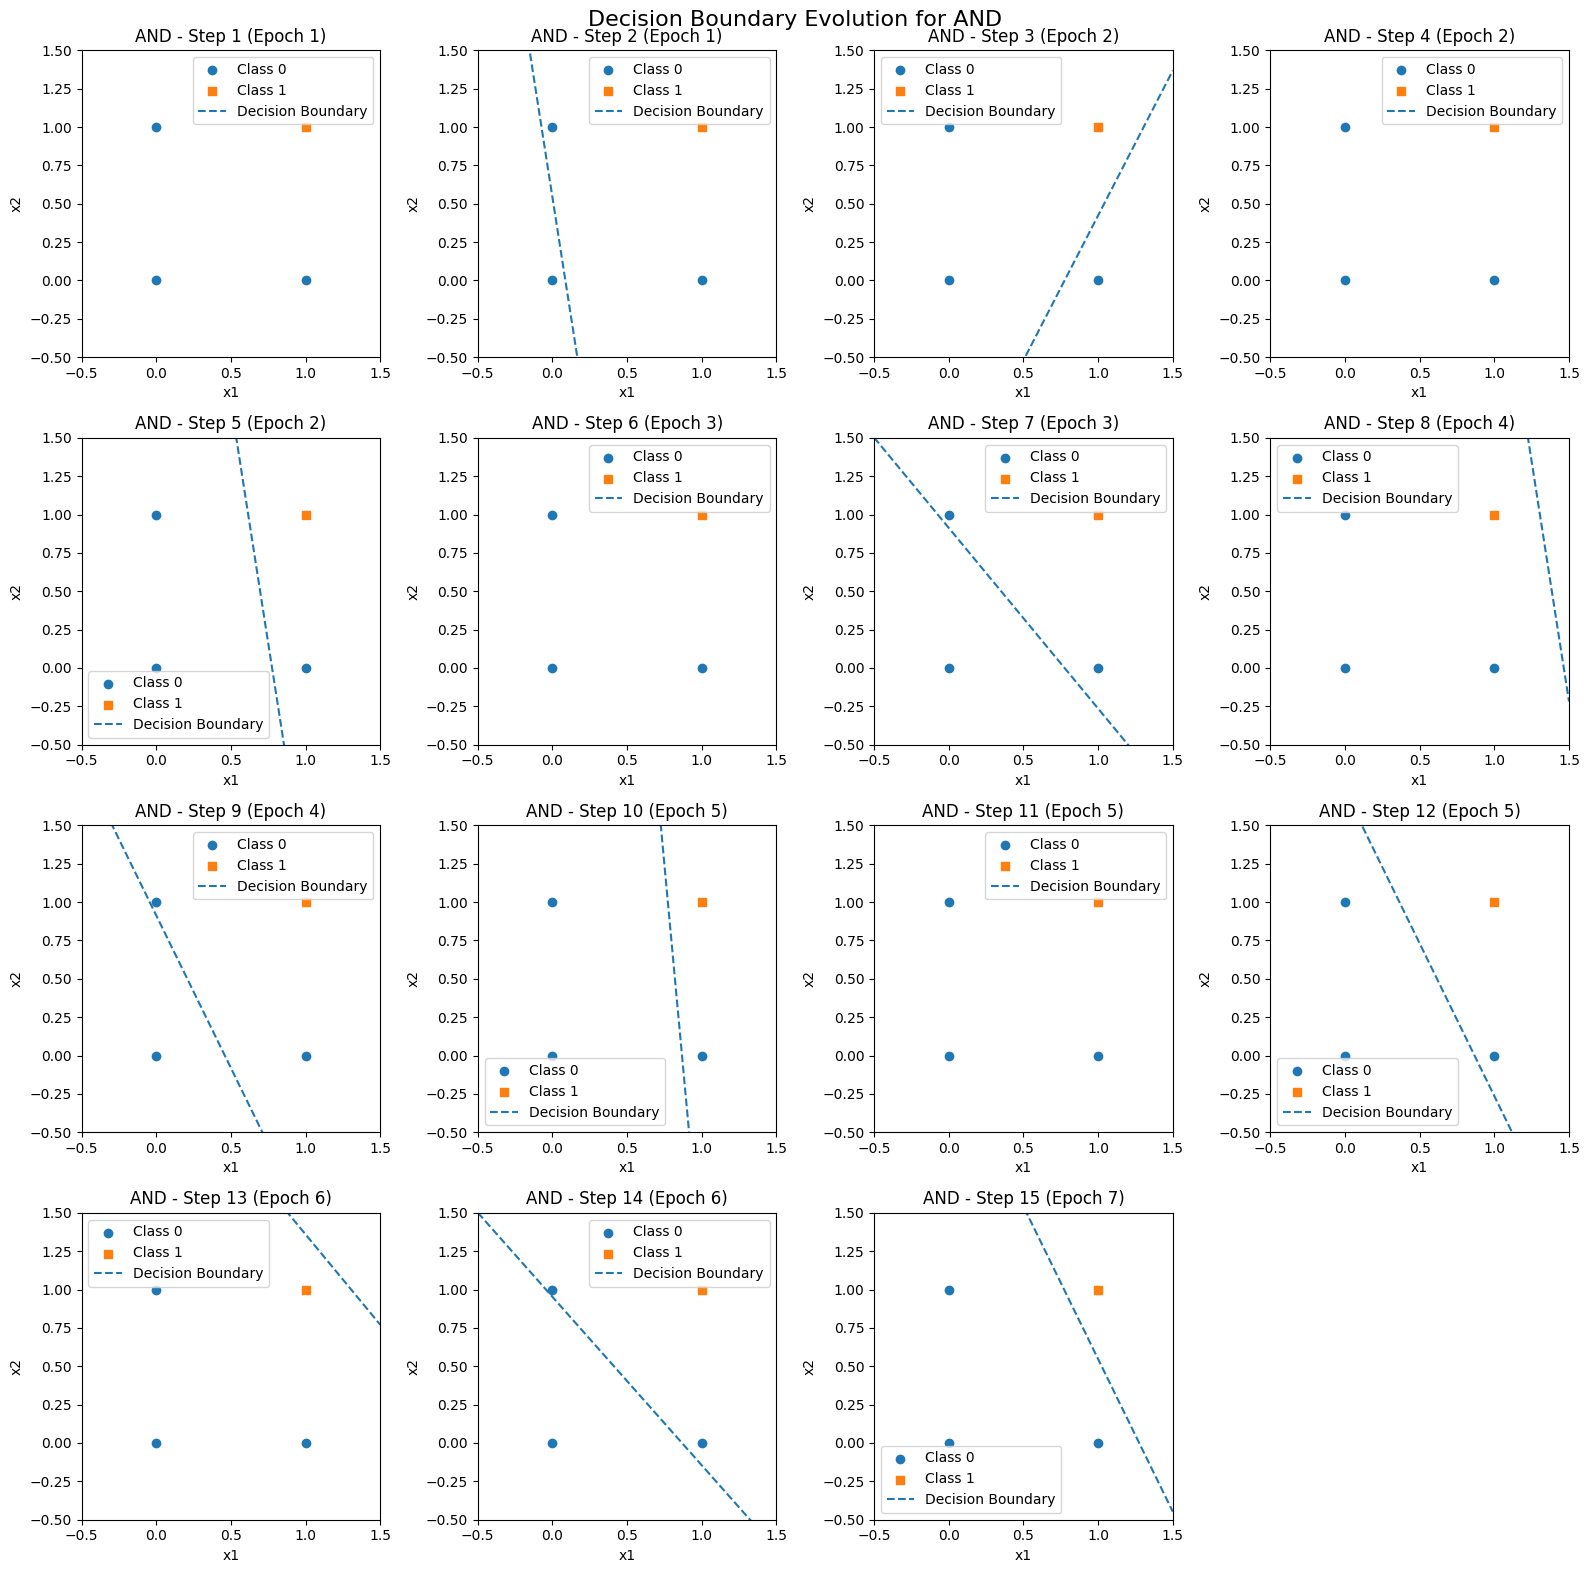

[AND] Training done. Final weights: [-3.12545988  2.45071431  1.23199394]
--------------------------------------------------------------------------------
[OR] Initial weights: [-0.12545988  0.45071431  0.23199394]
[OR] Converged at epoch 1. Final weights: [-0.12545988  0.45071431  0.23199394]

[OR] No weight updates happened (already separable with initial weights).
[NOT] Initial weights: [-0.12545988  0.45071431  0.23199394]
[NOT] Epoch 01, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[0.87454012 0.45071431 0.23199394]
[NOT] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -1.54928569  0.23199394]
[NOT] Epoch 03, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -1.54928569  0.23199394]
[NOT] Converged at epoch 4. Final weights: [ 0.87454012 -1.5

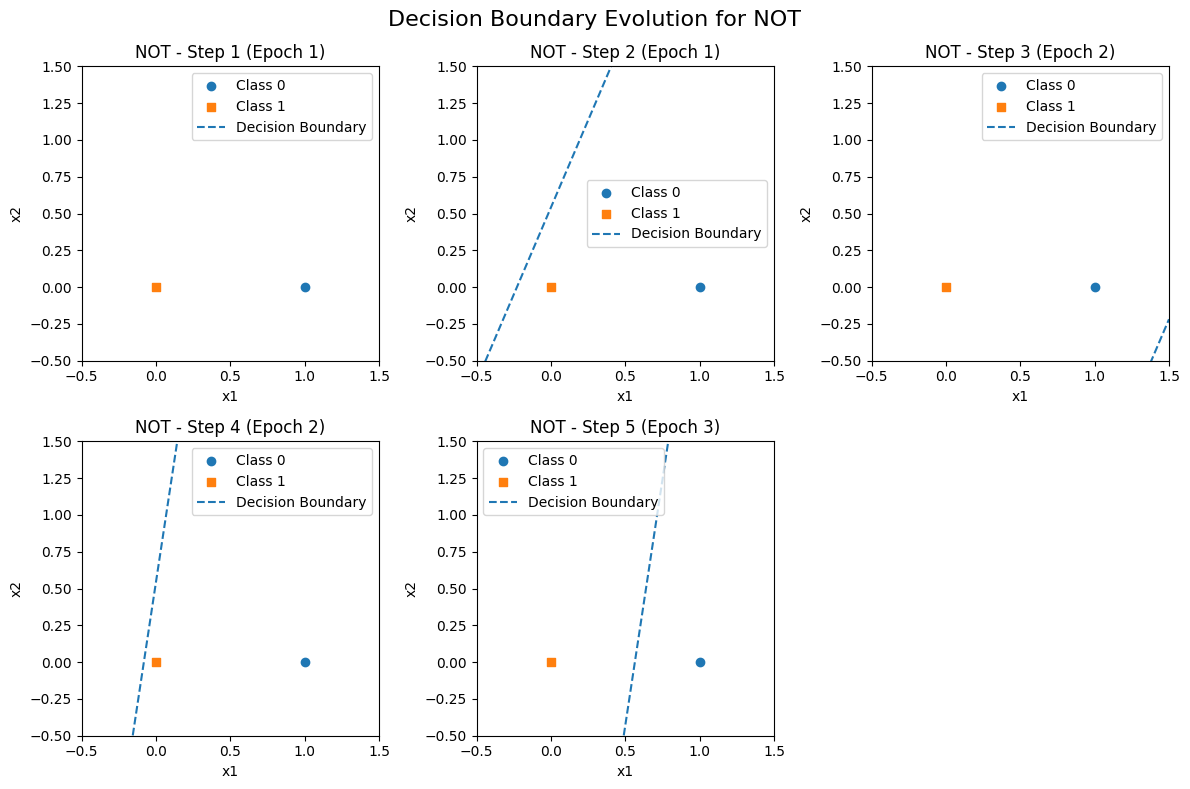

[NOT] Training done. Final weights: [ 0.87454012 -1.54928569  0.23199394]
--------------------------------------------------------------------------------


In [58]:
for gate in gates:
    X, y = get_gate_data(gate)
    p = Perceptron(lr=lr, n_epochs=n_epochs, random_state=42, verbose=True)
    final_w = p.fit(X, y, gate_name=gate)

    snaps = p.snapshots
    n = len(snaps)

    if n == 0:
        print(f"[{gate}] No weight updates happened (already separable with initial weights).")
        continue

    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    if rows == 1 and cols == 1:
        axs = np.array([axs])
    axs = axs.flatten()

    for i, s in enumerate(snaps):
        w = s["w"]
        step = s["step"]
        epoch = s["epoch"]
        plot_decision_boundary(
            ax=axs[i],
            X2d=p.X2d_,
            y=p.y_,
            w=w,
            title=f"{gate} - Step {step} (Epoch {epoch})"
        )

    for j in range(n, len(axs)):
        axs[j].axis('off')

    plt.suptitle(f"Decision Boundary Evolution for {gate}", fontsize=16)
    plt.tight_layout()
    plt.show()

    print(f"[{gate}] Training done. Final weights: {final_w}")
    print("-" * 80)


## Perceptron on XOR

Code the perceptron learning algorithm for the XOR gate using Python. Show the weights after each update. Plot the decision boundary after each weight update using Python's built-in packages. Analyze and identify the pattern that prevents the algorithm from converging.

In [59]:
def get_xor_data():
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=float)
    y = np.array([0, 1, 1, 0])
    return X, y

[XOR] Initial weights: [-0.12545988  0.45071431  0.23199394]
[XOR] Epoch 01, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988 -0.54928569 -0.76800606]
[XOR] Epoch 02, sample 1, y_true=1, y_pred=0, update=1.0, new_w=[-0.12545988 -0.54928569  0.23199394]
[XOR] Epoch 02, sample 2, y_true=1, y_pred=0, update=1.0, new_w=[0.87454012 0.45071431 0.23199394]
[XOR] Epoch 02, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -0.54928569 -0.76800606]
[XOR] Epoch 03, sample 1, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -0.54928569  0.23199394]
[XOR] Epoch 03, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -1.54928569 -0.76800606]
[XOR] Epoch 04, sample 1, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -1.54928569  0.23199394]
[XOR] Epoch 04, sample 2, y_true=1, y_pred=0, update=1.0, new_w=[ 1.87454012 -0.54928569  0.23199394]
[XOR] Epoch 04, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[ 0.87454012 -1.54928569 -0.76800606]
[XOR] Epoch 05, samp

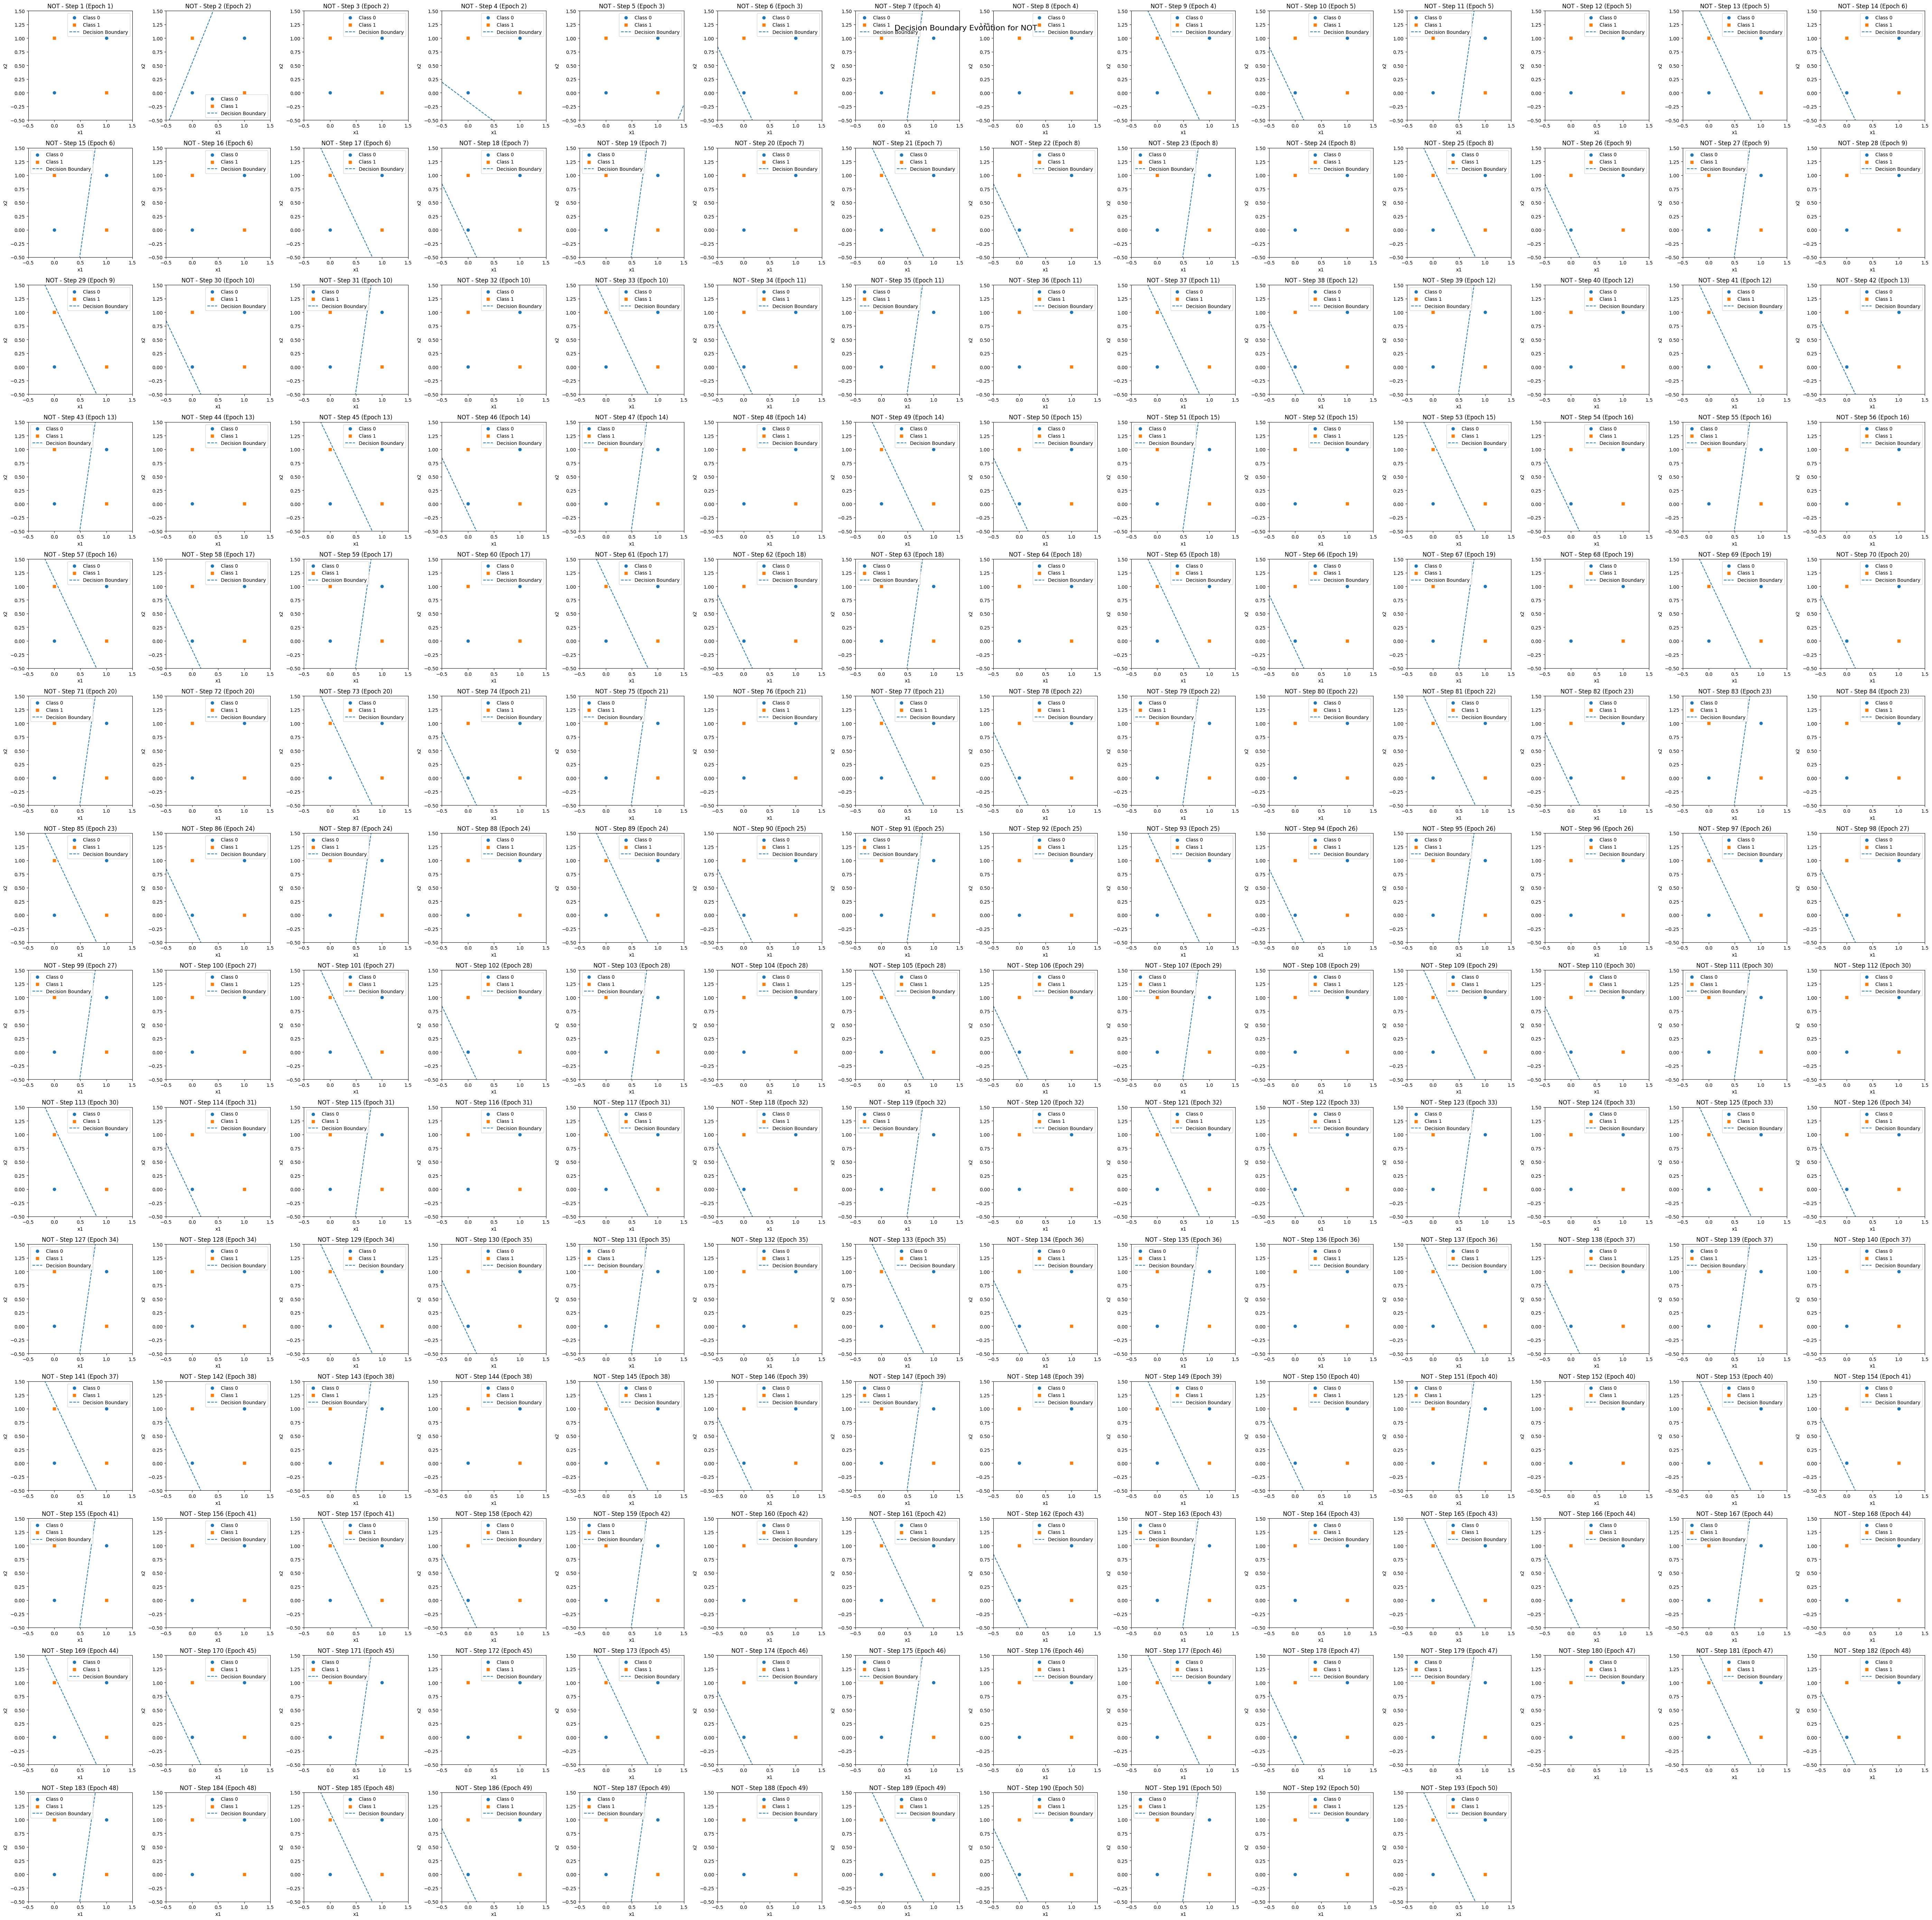

[NOT] Training done. Final weights: [ 0.87454012 -1.54928569 -0.76800606]
--------------------------------------------------------------------------------


In [61]:
X, y = get_xor_data()
p = Perceptron(lr=lr, n_epochs=n_epochs, random_state=42, verbose=True)
final_w = p.fit(X, y, gate_name="XOR")

snaps = p.snapshots
n = len(snaps)

if n == 0:
    print(f"[{gate}] No weight updates happened (already separable with initial weights).")

cols = math.ceil(math.sqrt(n))
rows = math.ceil(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
if rows == 1 and cols == 1:
    axs = np.array([axs])
axs = axs.flatten()

for i, s in enumerate(snaps):
    w = s["w"]
    step = s["step"]
    epoch = s["epoch"]
    plot_decision_boundary(
        ax=axs[i],
        X2d=p.X2d_,
        y=p.y_,
        w=w,
        title=f"{gate} - Step {step} (Epoch {epoch})"
    )

for j in range(n, len(axs)):
    axs[j].axis('off')

plt.suptitle(f"Decision Boundary Evolution for {gate}", fontsize=16)
plt.tight_layout()
plt.show()

print(f"[{gate}] Training done. Final weights: {final_w}")
print("-" * 80)

### Why XOR isnt converging?

* The perceptron tries to find a **linear decision boundary** to separate classes.
* XOR’s output pattern is **not linearly separable**; no straight line can separate the classes perfectly.
* Points of the same class lie diagonally opposite, making linear separation impossible.
* Because of this, the perceptron keeps updating weights endlessly, trying to correct misclassifications.
* The weight updates **oscillate and cycle without stabilizing**.
* This continuous flipping prevents the algorithm from converging (training error never reaches zero).
* Hence, the perceptron fails to learn the XOR function.
* To solve XOR, a **multi-layer perceptron (MLP)** with nonlinear activation functions is needed.
